<a href="https://colab.research.google.com/github/goulartsursula/DisciplinasUERJ/blob/master/Estrutura%20da%20Materia%203/MeiaVida_Bario137.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meia-vida Bário 137

### Objetivo

Calcular $\lambda$, através de 

$$\boxed{A_t = A_0 \ e^{\lambda t}}$$

Para, posteriormente, calcular a meia-vida do isótopo em questão

$$\boxed{\tau = \lambda \ log(2) }$$


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Construção da tabela de dados

1. Diferença entre as contagens
2. Como quando fazendo a contagem de eventos recebemos além da radiação da fonte (eventos de sinal), recebemos também a radiação do ambiente (evento de background), é necessário fazermos a diferença entre eles, de modo que fiquemos apenas a contagem de eventos provenientes da fonte. Essa diferença ta sendo chamada de 'TaxaMediaGM' e/ou 'TaxaMediaCintilador'.

    Para GM: 46.1 contagens por minuto
    
    Para o cintilador: 3454.4 eventos por minuto

3. Aplicar função logaritmica na base 10 na taxa média.
4. Remover a primeira linha (Linha nula)


In [142]:
data = pd.read_csv('bario137.csv')

data['DiferencaGM'] = data['GM'].diff()
data.fillna(0, inplace=True)

data['DiferencaCintilador'] = data['Cintilador'].diff()
data.fillna(0, inplace=True)

data['TaxaMediaGM'] = data['DiferencaGM'] - (46.1/3)
data['TaxaMediaCintilador'] = data['DiferencaCintilador'] - (3454.4/3)

#data.at[0, 'TaxaMediaGM'] = 0
#data.at[0, 'TaxaMediaCintilador'] = 0

data['LogTaxaGM'] = np.log10(data['TaxaMediaGM'])
data['LogTaxaCintilador'] = np.log10(data['TaxaMediaCintilador'])

data = data.drop(data[data.TaxaMediaGM < 0].index)

data.head(16)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Tempo,GM,Cintilador,DiferencaGM,DiferencaCintilador,TaxaMediaGM,TaxaMediaCintilador,LogTaxaGM,LogTaxaCintilador
1,20,419,40782,419.0,40782.0,403.633333,39630.533333,2.605987,4.598030
2,40,766,77879,347.0,37097.0,331.633333,35945.533333,2.520658,4.555645
3,60,1088,111949,322.0,34070.0,306.633333,32918.533333,2.486619,4.517440
4,80,1366,143187,278.0,31238.0,262.633333,30086.533333,2.419350,4.478372
5,100,1589,171580,223.0,28393.0,207.633333,27241.533333,2.317297,4.435232
6,120,1817,197775,228.0,26195.0,212.633333,25043.533333,2.327631,4.398696
7,140,2053,222129,236.0,24354.0,220.633333,23202.533333,2.343671,4.365535
8,160,2256,243868,203.0,21739.0,187.633333,20587.533333,2.273310,4.313604
9,180,2457,264019,201.0,20151.0,185.633333,18999.533333,2.268656,4.278743
10,200,2626,282707,169.0,18688.0,153.633333,17536.533333,2.186485,4.243944


### GM

Após calculado o $\lambda$ é necessário fazer um ajuste não-linear da curva, ajuste exponencial.

In [151]:
def ajuste(x, a, lamb):
  return a * np.exp(lamb * data['Tempo'])

poptgm, pcovgm = curve_fit(ajuste, data['Tempo'], data['LogTaxaGM'], p0 = (3, -0.001))

In [152]:
poptgm

array([ 2.60629224e+00, -8.29784369e-04])

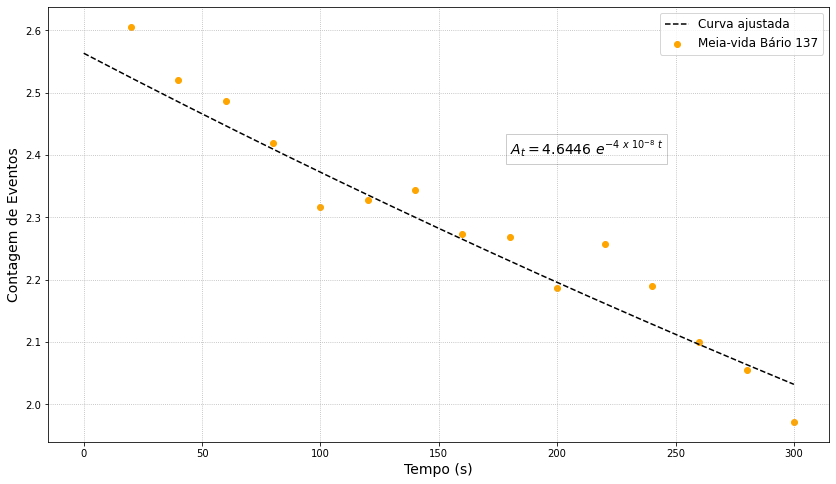

In [155]:
fig, ax = plt.subplots(1, figsize=(14,8))

x_GM = np.linspace(0, 300, num=15)
plt.plot(x_GM, ajuste(x_GM, *poptgm), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(data['Tempo'], data['LogTaxaGM'], c='orange', label='Meia-vida Bário 137')
plt.xlabel('Tempo (s)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(180.0, 2.4, '$A_t = 4.6446 \ e^{-4 \ x \ 10^{-8} \ t}$',fontsize=14, bbox = dict(boxstyle='square', fc='none', ec='black',alpha=0.2))
plt.legend(fontsize='12')
plt.grid(linestyle='dotted')

### Cintilador

Após calculado o $\lambda$ é necessário fazer um ajuste não-linear da curva, ajuste exponencial.

In [153]:
def ajuste(x, a, lamb):
  return a * np.exp(lamb * data['Tempo'])

poptcintilador, pcovcintilador = curve_fit(ajuste, data['Tempo'], data['LogTaxaCintilador'], p0 = (5, -0.001))

In [154]:
poptcintilador

array([ 4.64460355e+00, -4.58450639e-04])

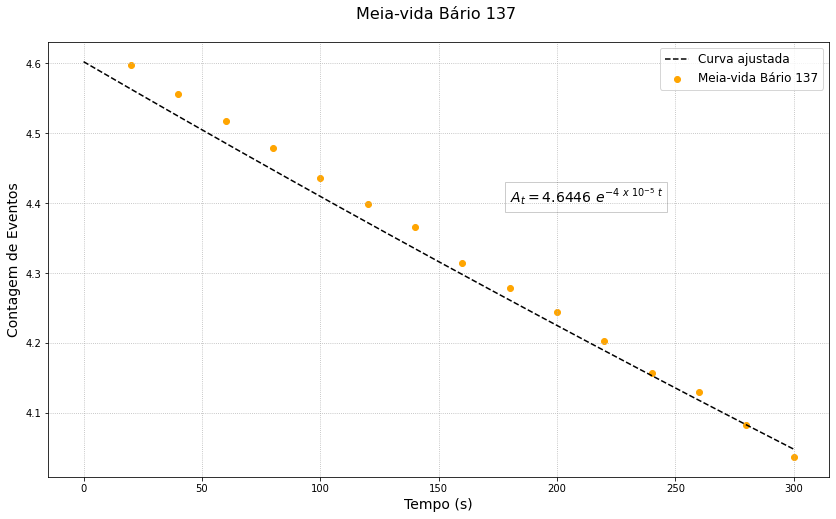

In [148]:
fig, ax = plt.subplots(1, figsize=(14,8))

x_c = np.linspace(0, 300, num=15)
plt.plot(x_c, ajuste(x_c, *poptcintilador), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(data['Tempo'], data['LogTaxaCintilador'], c='orange', label='Meia-vida Bário 137')

plt.title('Meia-vida Bário 137 \n', fontsize='16')

plt.xlabel('Tempo (s)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(180.0, 4.4, '$A_t = 4.6446 \ e^{-4 \ x \ 10^{-5} \ t}$',fontsize=14, bbox = dict(boxstyle='square', fc='none', ec='black',alpha=0.2))
plt.legend(fontsize='12')
plt.grid(linestyle='dotted')